Diabetes Dataset - Classifying Outcome of Diabetes


Authors:



Dylan Alick (400076938),
Simran Chadda (400485703),
Sourabh Dhumale (400487107),
Sobia Eram Khan Khan (400485847)


Date: December 23rd, 2022

In [32]:
from google.colab import drive
drive.mount('/content/drive')
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Importing time library for Computational times
import time
from sklearn.model_selection import train_test_split
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
#Gaussian Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
#AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
#Metrics for Classification, Cross-Validation
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import classification_report
from sklearn import metrics
#Library for ROC Curve
from sklearn.metrics import roc_curve,auc

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
#Import and Read Data File
path ="/content/drive/MyDrive/Machine Learning Project/diabetes.csv"

df_diabetes = pd.read_csv(path)
df_diabetes.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


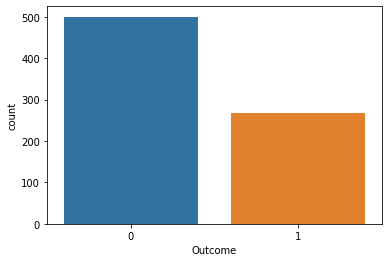

In [34]:
#Visualize the dataset
sns.countplot(x='Outcome',data=df_diabetes)

In [35]:
#Set the the number of features that will be used for the model
x = df_diabetes[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = df_diabetes['Outcome']

Training and Testing the Model

In [36]:
#Training 75% and Testing 25% of data randomly
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

print(x_train.shape)
print(x_test.shape)

(576, 8)
(192, 8)


K Nearest Neighbors Algorithm

K-Nearest Neigbours Algorithm
Training Time: 0.004245281219482422 s
Testing Time: 0.004731416702270508 s
{'KNN Accuracy:': 0.6822916666666666}
Cross Validation Scores:  [0.72727273 0.68831169 0.72077922 0.76470588 0.71895425]
Average CV Score:  0.7240047534165182
              precision    recall  f1-score   support

           0       0.74      0.76      0.75       122
           1       0.57      0.54      0.55        70

    accuracy                           0.68       192
   macro avg       0.66      0.65      0.65       192
weighted avg       0.68      0.68      0.68       192



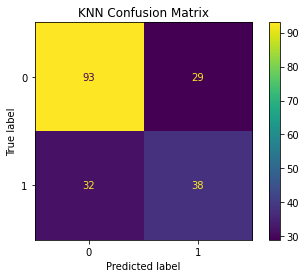

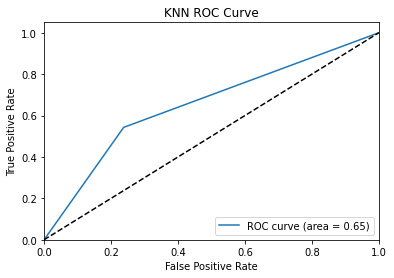

In [37]:
#Training the algorithm
start = time.time()
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5,weights='distance',metric = 'minkowski',p=2)
#Fit Classifier to the data
knn.fit(x_train,y_train)
end = time.time()
training_time = end-start

#Testing the algorithm
start = time.time()
y_predKNN = knn.predict(x_test)
end = time.time()
testing_time = end-start

#Cross-Validation
k_folds=KFold(n_splits=5)
scores = cross_val_score(knn,x,y,cv=k_folds)

#Displaying computational times and accuracy
print("K-Nearest Neigbours Algorithm")
print("Training Time:", training_time,"s")
print("Testing Time:", testing_time,"s")
print ({"KNN Accuracy:":metrics.accuracy_score(y_test,y_predKNN)})
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())

#Confusion Matrix
print(classification_report(y_test,y_predKNN))
knn_CM = metrics.confusion_matrix(y_test,y_predKNN)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = knn_CM, display_labels = ['0','1'])
cm_display.plot()
plt.title('KNN Confusion Matrix')
plt.show()

#ROC Curve
fpr,tpr,_=roc_curve(y_test,y_predKNN)
roc_auc=auc(fpr,tpr)

#Plot ROC curve 
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.legend(loc="lower right")
plt.show()

Naive Bayes Algorithm

Gaussian Naive Bayes Algorithm
Training Time: 0.003509998321533203 s
Testing Time: 0.0025353431701660156 s
{'Gaussian NB Accuracy:': 0.7552083333333334}
Cross Validation Scores:  [0.75324675 0.71428571 0.74675325 0.80392157 0.74509804]
Average CV Score:  0.7526610644257703
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       122
           1       0.68      0.61      0.65        70

    accuracy                           0.76       192
   macro avg       0.74      0.73      0.73       192
weighted avg       0.75      0.76      0.75       192



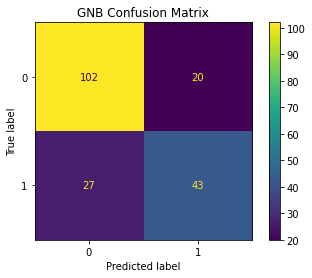

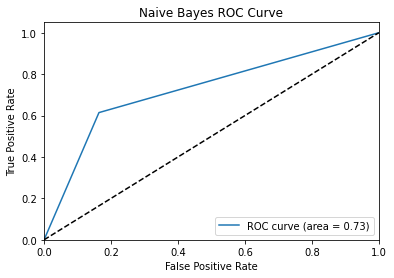

In [38]:
#Training the algorithm
start = time.time()
#Create Naive Bayes Classifier
gnb = GaussianNB()
#Fit Classifier to the data
gnb.fit(x_train,y_train)
end = time.time()
training_time = end - start

#Testing the algorithm
start = time.time()
y_predGNB = gnb.predict(x_test)
end = time.time()
testing_time = end - start

#Cross-Validation
k_folds=KFold(n_splits=5)
scores = cross_val_score(gnb,x,y,cv=k_folds)

#Displaying computational times and accuracy
print("Gaussian Naive Bayes Algorithm")
print("Training Time:", training_time,"s")
print("Testing Time:", testing_time,"s")
print ({"Gaussian NB Accuracy:":metrics.accuracy_score(y_test,y_predGNB)})
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())

#Confusion Matrix
print(classification_report(y_test,y_predGNB))
gnb_CM = metrics.confusion_matrix(y_test,y_predGNB)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = gnb_CM, display_labels = ['0','1'])
cm_display.plot()
plt.title('GNB Confusion Matrix')
plt.show()

#ROC Curve
fpr,tpr,_=roc_curve(y_test,y_predGNB)
roc_auc=auc(fpr,tpr)

#Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes ROC Curve')
plt.legend(loc="lower right")
plt.show()

Adaboost

AdaBoost Algorithm
Computational Times
Training Time: 0.18856477737426758 s
Testing Time: 0.20755743980407715 s
{'AdaBoost Accuracy:': 0.7395833333333334}
Cross Validation Scores:  [0.75974026 0.68831169 0.75974026 0.79084967 0.73856209]
Average CV Score:  0.747440794499618
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       122
           1       0.67      0.56      0.61        70

    accuracy                           0.74       192
   macro avg       0.72      0.70      0.71       192
weighted avg       0.73      0.74      0.73       192



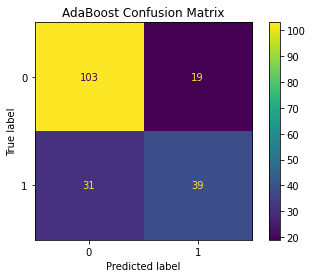

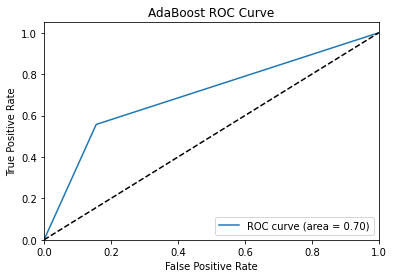

In [39]:
#Training the algorithm
start = time.time()
ada = AdaBoostClassifier(n_estimators=100, random_state=0)
#Training the classifier
ada.fit(x_train,y_train)
end = time.time()
training_time = end - start

#Testing the algorithm
testing_time = end - start
y_predADA = ada.predict(x_test)
end = time.time()
testing_time = end - start

#Cross-Validation
k_folds=KFold(n_splits=5)
scores = cross_val_score(ada,x,y,cv=k_folds)

#Displaying computational times and accuracy
print("AdaBoost Algorithm")
print("Computational Times")
print("Training Time:", training_time,"s")
print("Testing Time:", testing_time,"s")
print ({"AdaBoost Accuracy:":metrics.accuracy_score(y_test,y_predADA)})
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())

#Confusion Matrix
print(classification_report(y_test,y_predADA))
ada_CM = metrics.confusion_matrix(y_test,y_predADA)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = ada_CM, display_labels = ['0','1'])
cm_display.plot()
plt.title('AdaBoost Confusion Matrix')
plt.show()

#ROC Curve
fpr,tpr,_=roc_curve(y_test,y_predADA)
roc_auc=auc(fpr,tpr)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoost ROC Curve')
plt.legend(loc="lower right")
plt.show()